
<img src="https://raw.githubusercontent.com/archivesunleashed/archivesunleashed.org/master/themes/hugo-material-docs/static/images/logo-square.png" height="100px" width="100px">


# Welcome to the Network Analysis Notebook

Welcome to the Archives Unleashed Network Analysis Jupyter Notebook. This demonstration takes the network (Gephi) derivatives from the Cloud and uses Python to analyze and produce information about the link structure of your collection.

Please feel free to create an [issue](https://github.com/archivesunleashed/auk/issues) to let us know about any bugs you encounter or improvements you would like to see.

If you have Python experience, please feel free to change the provided code to suit your own needs.

We recommend that you use `File > Make a Copy` first before changing the code in the repository. That way, you can always return to the basic visualizations we have offered here. Of course, you can also just re-download the Jupyter Notebook file from your Archives Unleashed Cloud account.

### How Jupyter Notebooks Work

If you have no previous experience with Jupyter Notebooks, the most important thing to understand is that that `<Shift> + <Enter/Return>` will run the Python code inside a cell and output it to below the cell.
    
The cells that cover the required inputs, marked "Setup", need to be run before the rest of the notebook will work. These cells will import all the libraries and set basic variables (e.g. where your derivative files are located) for the notebook. After that, everything else should be able to run on its own.

If you just want to see all results for your collection, use `Cell > Run All`.


# Setup

## The Collection ID

This variable is the most important, and the only variable you need to change to see a complete set of visualizations for your [Archives Unleashed Cloud derivatives](https://cloud.archivesunleashed.org/derivatives).

In [1]:
COLLECTION_ID = '4867'  # Change to switch collections.
AUK_PATH = 'data/'  # Change value to full path to your data, including trailing slash.

This section imports the AuNotebook custom class that includes some methods for accessing derivatives and producing visualizations. Also, some libraries like [numpy](http://www.numpy.org/), and [networkx](https://networkx.github.io/) will be imported so you can do additional analysis.

In [2]:
# Required packages.

from au_notebook import au_notebook
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

## User Configuration

The following cell sets up the notebook functions under the name `nb`. If you want to use one of the functions in the class, you can use `nb.function_name()`. For example, `nb.get_text()` returns the data from the text derivative as a single text string. Use `nb.__dict__` to see the available settings and functions and `help(nb.function_name)` to see the documentation for a particular function. 

While setting up the functions, you may also want to change some of the default settings.

Take a look here: are there any domains you are not interested in? How many words would you like to be shown? Do you want to filter out 404 results? Do you want to sample the data? Read the choices below carefully.

In [3]:
if 'nb' in globals():
    del nb
nb = au_notebook(
        COLLECTION_ID, AUK_PATH,
    )

# Network Analysis

Sometimes it is useful to include information about the relationships among different websites. We recommend using [Gephi](https://gephi.org/) for graph visualization, but it is possible in this notebook using the Python networkx library as well.

Change the variables in the following cell to manipulate the network analysis that you will be carrying out. Some of these relate to the size of the output, the labels on the graph, and also any domains you might want to exclude from your analysis.

In [4]:
NETWORK_BAR_WIDTH = 0.35
NETWORK_PLOT_FIGURE_SIZE = [10, 4] # Set the figure for the graph.
NETWORK_EXCLUDE = ["google.com"] # Add / Remove urls if you want them out of the analysis.
NETWORK_Y_LABEL = 'Degree'
NETWORK_TITLE = 'Domains by degree.'

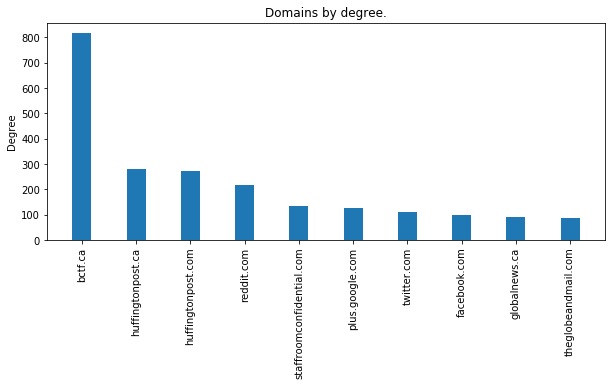

In [5]:
# Degree distribution of domains.

# We wrap a few cells below in try/catch statements in case the Cloud doesn't produce graph files.
try:
    plt.rcParams['figure.figsize'] = NETWORK_PLOT_FIGURE_SIZE # Set the figure size for the graph.
    graph = nx.read_gexf(nb.auk_gephi) # Import the graph.
    g_nodes = zip([x[1] for x in graph.nodes('label')], [x[1] for x in graph.nodes('Degree')])
    gs = sorted([x for x in g_nodes], key=lambda s: s[1], reverse=True)
    vals = [x[1] for x in gs if x[0] not in NETWORK_EXCLUDE][:10]
    labs = [x[0] for x in gs if x[0] not in NETWORK_EXCLUDE][:10]
    ind = np.arange(len(vals))
    width = NETWORK_BAR_WIDTH
    p1 = plt.bar(ind, vals, width)
    plt.ylabel(NETWORK_Y_LABEL)
    plt.title(NETWORK_TITLE)
    plt.xticks(ind, labs, rotation='vertical')
    plt.show()
    
except:
    print("Sorry, graph file is unavailable for analysis.")

Change the variables in the following cell to manipulate the visualization that you're about to generate. Do you want the network diagram to be bigger or smaller? Do nodes need to shrink or grow? Are the labels too big or too small? You may need to experiment with the values a bit.

In [6]:
NETWORK_GRAPH_FIGURE_SIZE = [25, 25] # Change the size of the plot.
NETWORK_NODE_SIZE = 100 # Increase or decrease the node size for the graph.
NETWORK_FONT_SIZE = 10 # Increase or decrease the font size for the graph.
NETWORK_SHOW_LABELS = True # Change to False if you do not want to see the labels.

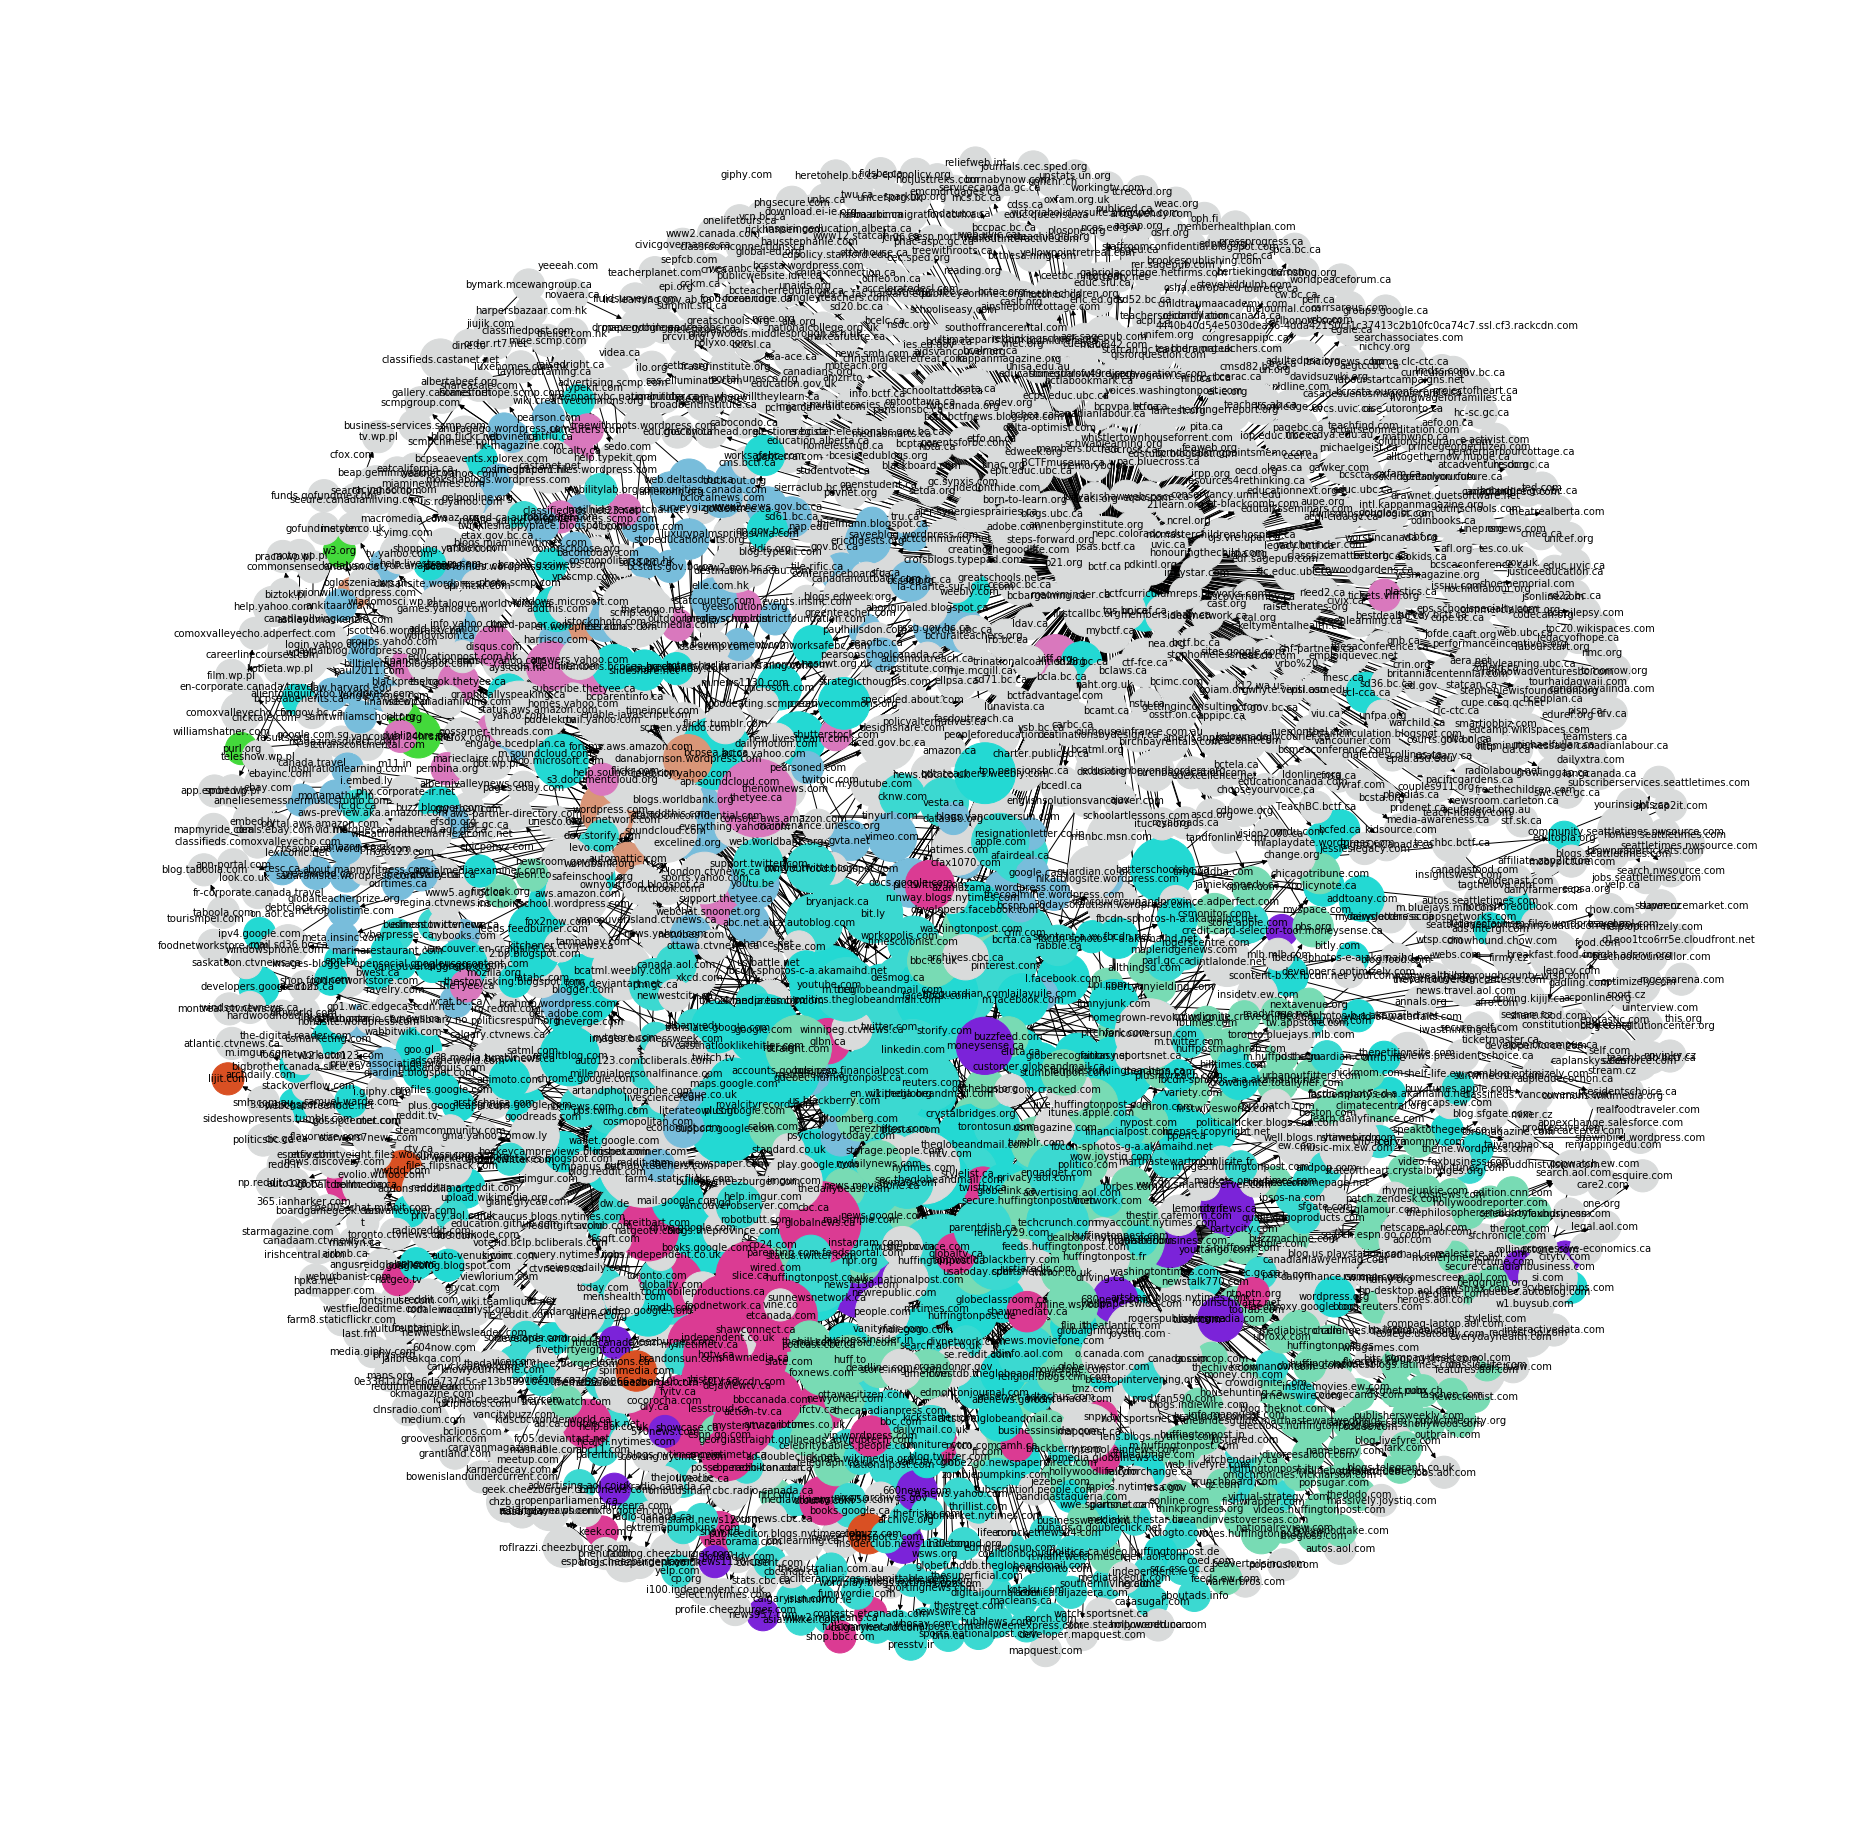

In [7]:
# Network graph.

try:
    plt.rcParams['figure.figsize'] = NETWORK_GRAPH_FIGURE_SIZE
    
    # Convert rgb values to between 0 & 1 and put them into a numpy array.
    
    rgbs = zip([x[1]/255 for x in graph.nodes('r')], 
               [x[1]/255 for x in graph.nodes('g')], 
               [x[1]/255 for x in graph.nodes('b')])
    colormap = [np.array(x) for x in rgbs]
    
    # Labels.
    
    mapping = {x[0]: x[1] for x in graph.nodes('label')}
    
    # Use Archive Unleashed Clouds positions (saves on load time).
    
    zippos = zip(graph.nodes, [x[1] for x in graph.nodes('x')], [x[1] for x in graph.nodes('y')])
    positions = {x[0]: np.array([x[1],x[2]]) for x in zippos}
    
    # Node sizes based on degree.
    
    size = np.array([x[1] * NETWORK_NODE_SIZE for x in graph.nodes('size')])
    
    # Draw the graph.
    
    nx.draw(graph, pos=positions, show_labels=NETWORK_SHOW_LABELS, 
            labels=mapping, font_size=NETWORK_FONT_SIZE, 
            node_size=size, node_color=colormap)
    plt.show()
    
except:
    print("Sorry, graph file is unavailable for analysis.")

Change the variables in the following cell to manipulate the visualization that you are about to generate. What node do you want the diagram to focus on? The biggest one? Or a specific one?

In [8]:
NETWORK_EGO_NODE_ORDINAL = 0 # Selects the largest node (by degree). Use `1` for 2nd largest,`2` for third largest etc.
NETWORK_EGO_NODE_SPECIFIC = '' # Change to a non-signed node id (eg. 'n20') if you want to select a particular node.

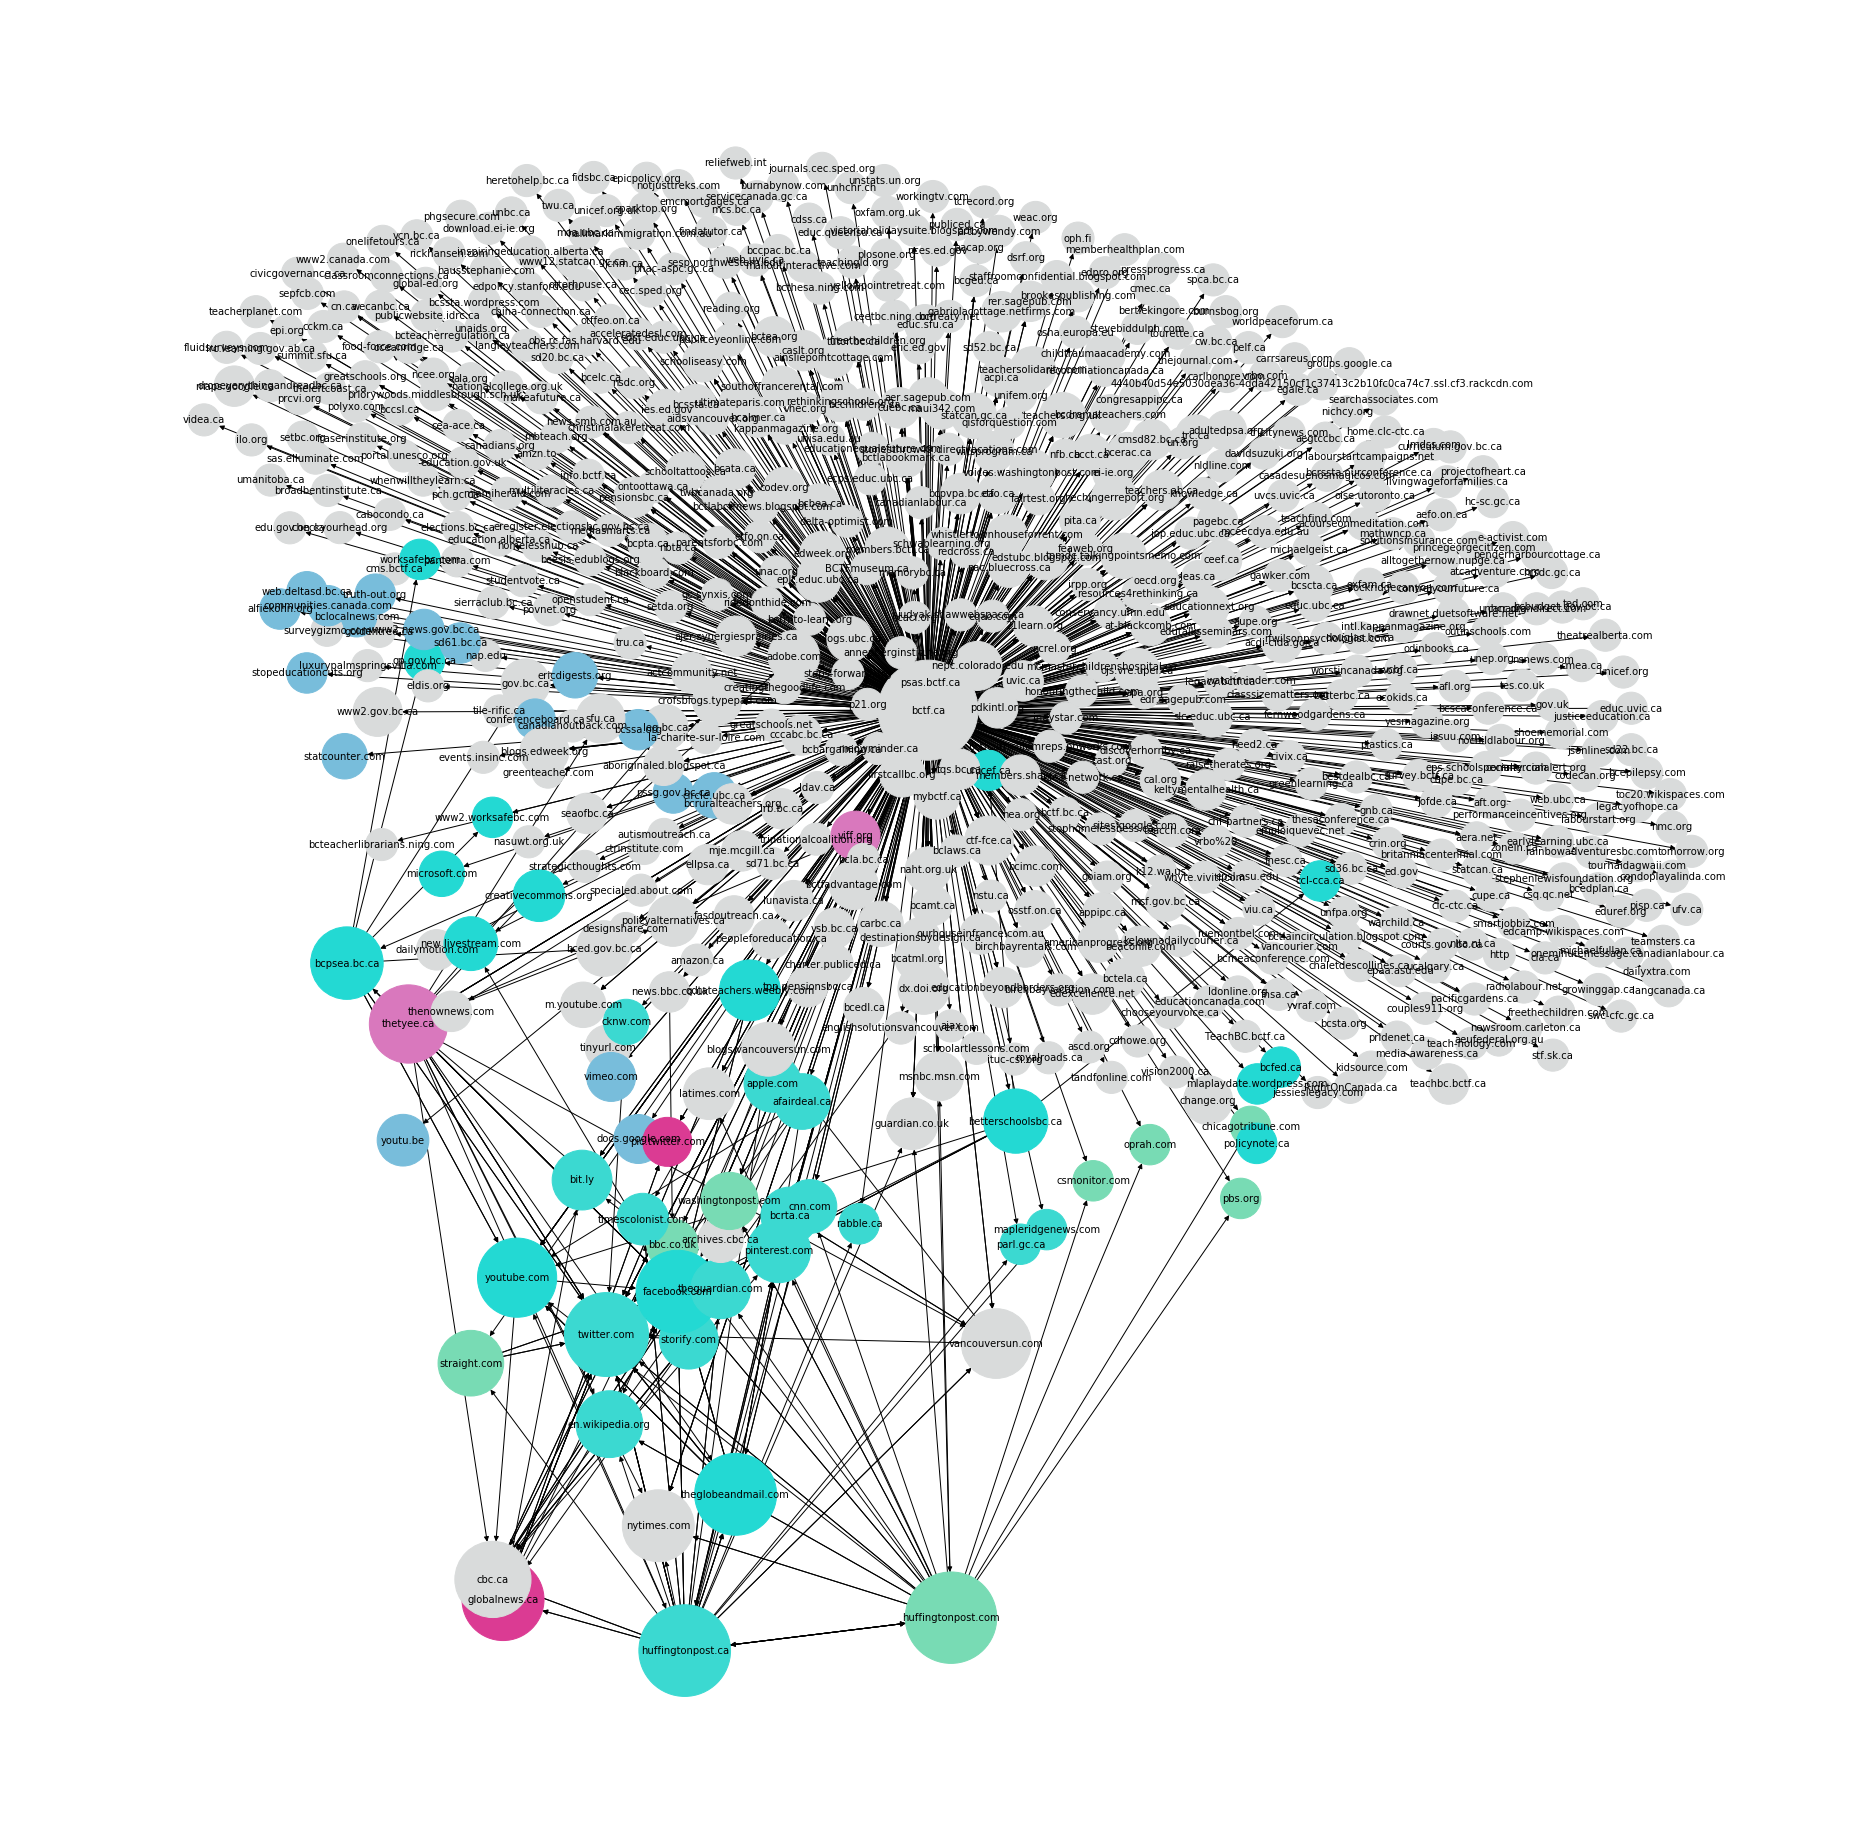

In [9]:
# Ego network for a particular node.

try:
    largest_node = sorted(graph.nodes('Degree'), 
                          key=lambda s: s[1], 
                          reverse=True)[NETWORK_EGO_NODE_ORDINAL][0] # [1][0] is second largest, etc.
    node = NETWORK_EGO_NODE_SPECIFIC if (NETWORK_EGO_NODE_SPECIFIC) else largest_node
    neigh = graph.subgraph(graph.neighbors(node))
    
    # Convert rgb values to between 0 & 1 and put them into a numpy array.
    
    rgbs = zip([x[1]/255 for x in neigh.nodes('r')], 
               [x[1]/255 for x in neigh.nodes('g')], 
               [x[1]/255 for x in neigh.nodes('b')])
    colormap = [np.array(x) for x in rgbs]
    
    # Labels.
    
    mapping = {x[0]: x[1] for x in neigh.nodes('label')}
    
    # Use Archive Unleashed Clouds positions (saves on load time).
    
    zippos = zip(neigh.nodes, [x[1] for x in neigh.nodes('x')], [x[1] for x in neigh.nodes('y')])
    positions = {x[0]: np.array([x[1],x[2]]) for x in zippos}
    
    # Node sizes based on degree.
    
    size = np.array([x[1] * NETWORK_NODE_SIZE for x in neigh.nodes('size')])
    nx.draw(neigh, pos=positions, show_labels=NETWORK_SHOW_LABELS, 
            labels=mapping, font_size=NETWORK_FONT_SIZE, 
            node_size=size, node_color=colormap)
    plt.show()
    
except:
    print("Sorry, graph file is unavailable for analysis.")

# Bibliography
- Archives Unleashed Project. (2018). Archives Unleashed Toolkit (Version 0.17.0). Apache License, Version 2.0.
- Aric A. Hagberg, Daniel A. Schult and Pieter J. Swart, “Exploring network structure, dynamics, and function using NetworkX”, in Proceedings of the 7th Python in Science Conference (SciPy2008), Gäel Varoquaux, Travis Vaught, and Jarrod Millman (Eds), (Pasadena, CA USA), pp. 11–15, Aug 2008.
- Bird, Steven, Edward Loper and Ewan Klein (2009), *Natural Language Processing with Python*. O’Reilly Media Inc.
- University of Victoria Libraries, B.C. Teachers' Labour Dispute (2014), Archive-It Collection 4867, https://archive-it.org/collections/4867.